In [9]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import copy
import queue
from shower_sim_instrumented import simulator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:

from shower_sim_optimize import optimize, program_to_optimize
from shower_sim_baseline import summary_metric
the_program = program_to_optimize(simulator, summary_metric)

In [11]:
hits,active,history,scores,out_st = simulator(3.5)
print(scores, out_st['w'], hits.size, out_st['y']['hits'].size)

9.163147 0.1394564655585384 3316 2864


In [17]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 100

print("#### STAD ####")
opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad")

print("#### SCORE ####")
opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False)

print("#### SCORE Baseline ####")
opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True)

print("#### NUMERIC ####")
opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric")



#### STAD ####


100%|██████████| 100/100 [00:22<00:00,  4.40it/s]


#### SCORE ####


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


#### SCORE Baseline ####


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


#### NUMERIC ####


100%|██████████| 100/100 [00:48<00:00,  2.05it/s]


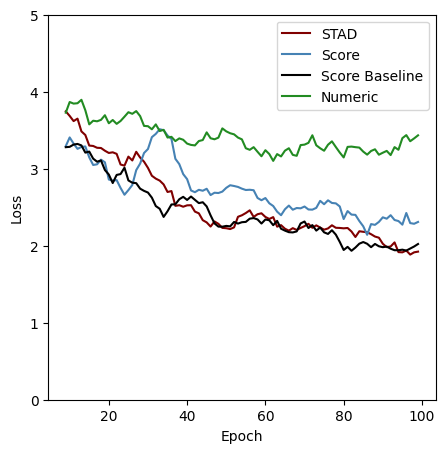

In [73]:
from plots_optimization import plot_single_opt_comparison
f,ax = plt.subplots()
plot_single_opt_comparison(ax,l_st, l_s, l_sb, l_n)
f.set_size_inches(5,5)

# With Error Bands

In [24]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 100 

Nopt = 10

opt_par_st_list, par_st_list, l_st_list, g_st_list = [], [], [], []
opt_par_s_list, par_s_list, l_s_list, g_s_list = [], [], [], []
opt_par_sb_list, par_sb_list, l_sb_list, g_sb_list = [], [], [], []
opt_par_n_list, par_n_list, l_n_list, g_n_list = [], [], [], []

for j in range(Nopt):
    print("######## Optimization", j, "########")
    
    opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad", doprint=False)
    opt_par_st_list.append(par_st)
    par_st_list.append(par_st) 
    l_st_list.append(l_st)
    g_st_list.append(g_st)
    print("STAD Loss final= {:5.3f}".format(l_st[-1]), "Loss min= {:5.3f}".format(np.min(l_st)))

    opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False, doprint=False)
    opt_par_s_list.append(par_s)
    par_s_list.append(par_s) 
    l_s_list.append(l_s)
    g_s_list.append(g_s)
    print("Score Loss final= {:5.3f}".format(l_s[-1]), "Loss min= {:5.3f}".format(np.min(l_s)))
    
    opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True, doprint=False)
    opt_par_sb_list.append(par_sb)
    par_sb_list.append(par_sb) 
    l_sb_list.append(l_sb)
    g_sb_list.append(g_sb)
    print("Score (baseline) Loss final= {:5.3f}".format(l_sb[-1]), "Loss min= {:5.3f}".format(np.min(l_sb)))
    
    opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric", doprint=False)
    opt_par_n_list.append(par_n)
    par_n_list.append(par_n) 
    l_n_list.append(l_n)
    g_n_list.append(g_n)
    print("Numeric Loss final= {:5.3f}".format(l_n[-1]), "Loss min= {:5.3f}".format(np.min(l_n)))
    
    

######## Optimization 0 ########


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


STAD Loss final= 1.956 Loss min= 1.752


100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


Score Loss final= 2.736 Loss min= 1.748


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Score (baseline) Loss final= 2.392 Loss min= 1.663


100%|██████████| 100/100 [33:01<00:00, 19.81s/it]  


Numeric Loss final= 3.587 Loss min= 2.353
######## Optimization 1 ########


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


STAD Loss final= 1.597 Loss min= 1.462


100%|██████████| 100/100 [00:20<00:00,  4.80it/s]


Score Loss final= 2.827 Loss min= 2.130


100%|██████████| 100/100 [00:19<00:00,  5.03it/s]


Score (baseline) Loss final= 1.709 Loss min= 1.538


100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


Numeric Loss final= 3.890 Loss min= 2.409
######## Optimization 2 ########


100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


STAD Loss final= 3.135 Loss min= 1.669


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


Score Loss final= 2.758 Loss min= 1.715


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


Score (baseline) Loss final= 1.955 Loss min= 1.487


100%|██████████| 100/100 [00:39<00:00,  2.54it/s]


Numeric Loss final= 2.350 Loss min= 2.115
######## Optimization 3 ########


100%|██████████| 100/100 [00:18<00:00,  5.27it/s]


STAD Loss final= 1.723 Loss min= 1.450


100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


Score Loss final= 3.292 Loss min= 2.410


100%|██████████| 100/100 [00:19<00:00,  5.12it/s]


Score (baseline) Loss final= 2.892 Loss min= 1.382


100%|██████████| 100/100 [00:39<00:00,  2.51it/s]


Numeric Loss final= 3.551 Loss min= 2.555
######## Optimization 4 ########


100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


STAD Loss final= 1.300 Loss min= 1.300


100%|██████████| 100/100 [00:20<00:00,  4.99it/s]


Score Loss final= 2.590 Loss min= 2.444


100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


Score (baseline) Loss final= 2.007 Loss min= 1.256


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Numeric Loss final= 2.754 Loss min= 2.308
######## Optimization 5 ########


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


STAD Loss final= 2.111 Loss min= 1.366


100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


Score Loss final= 2.063 Loss min= 1.769


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


Score (baseline) Loss final= 2.646 Loss min= 1.407


100%|██████████| 100/100 [00:40<00:00,  2.46it/s]


Numeric Loss final= 3.405 Loss min= 2.506
######## Optimization 6 ########


100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


STAD Loss final= 1.756 Loss min= 1.468


100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


Score Loss final= 2.108 Loss min= 1.625


100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


Score (baseline) Loss final= 1.785 Loss min= 1.452


100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


Numeric Loss final= 3.388 Loss min= 1.787
######## Optimization 7 ########


100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


STAD Loss final= 2.310 Loss min= 1.427


100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


Score Loss final= 2.440 Loss min= 1.737


100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


Score (baseline) Loss final= 1.666 Loss min= 1.666


100%|██████████| 100/100 [00:40<00:00,  2.47it/s]


Numeric Loss final= 2.736 Loss min= 2.711
######## Optimization 8 ########


100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


STAD Loss final= 2.109 Loss min= 1.635


100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Score Loss final= 3.206 Loss min= 2.381


100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


Score (baseline) Loss final= 1.645 Loss min= 1.511


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Numeric Loss final= 2.905 Loss min= 2.355
######## Optimization 9 ########


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


STAD Loss final= 2.080 Loss min= 1.401


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]


Score Loss final= 2.636 Loss min= 1.637


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


Score (baseline) Loss final= 2.177 Loss min= 1.511


100%|██████████| 100/100 [00:44<00:00,  2.24it/s]

Numeric Loss final= 3.517 Loss min= 2.370


In [26]:
l_st_list = np.array(l_st_list)
l_st_list_mean = np.mean(l_st_list, axis=0)
l_st_list_std = np.std(l_st_list, axis=0)

g_st_list = np.array(g_st_list)
g_st_list_mean = np.mean(g_st_list, axis=0)
g_st_list_std = np.std(g_st_list, axis=0)

l_s_list = np.array(l_s_list)
l_s_list_mean = np.mean(l_s_list, axis=0)
l_s_list_std = np.std(l_s_list, axis=0)

g_s_list = np.array(g_s_list)
g_s_list_mean = np.mean(g_s_list, axis=0)
g_s_list_std = np.std(g_s_list, axis=0)

l_sb_list = np.array(l_sb_list)
l_sb_list_mean = np.mean(l_sb_list, axis=0)
l_sb_list_std = np.std(l_sb_list, axis=0)

g_sb_list = np.array(g_sb_list)
g_sb_list_mean = np.mean(g_sb_list, axis=0)
g_sb_list_std = np.std(g_sb_list, axis=0)

l_n_list = np.array(l_n_list)
l_n_list_mean = np.mean(l_n_list, axis=0)
l_n_list_std = np.std(l_n_list, axis=0)

g_n_list = np.array(g_n_list)
g_n_list_mean = np.mean(g_n_list, axis=0)
g_n_list_std = np.std(g_n_list, axis=0)

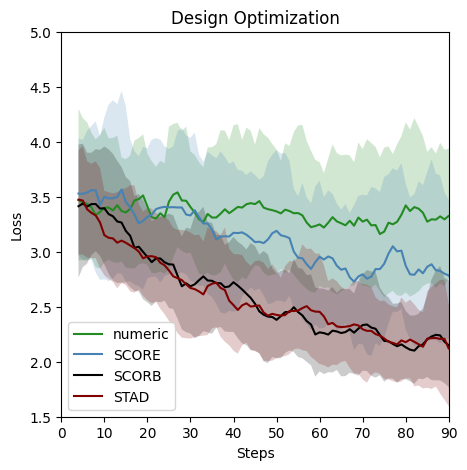

In [71]:
from plots_optimization import plot_optimization_comparison

f,ax = plt.subplots(1,1)
plot_optimization_comparison(ax, l_st_list,
    l_s_list,
    l_n_list,
    l_sb_list
)
f.set_size_inches(5,5)
f.savefig('optim.pdf')

In [72]:
!open .